# Financial Sentiment Analysis 
Usimg  machine learning classifier algorithms to analyze financial statements. 

Data source - [Financial Sentiment Data, Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

## Importing required libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Set the inline backend for Matplotlib
%matplotlib inline

# Import the Seaborn library
import seaborn as sns

# Import regular expressions and the WordCloud library
import re
#!pip install wordcloud -qq
from wordcloud import WordCloud

# Import the NLTK library and download the necessary resources
import nltk
nltk.download(['stopwords',
                'punkt',
                'wordnet',
                'omw-1.4',
                'vader_lexicon'
                ])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kayode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kayode\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kayode\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kayode\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kayode\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Loading the data 

In [2]:
df = pd.read_csv('Financial Sentiment Analysis.csv')

df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


## Exploratory Data Analysis and preprocessing

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


c:\Users\kayode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


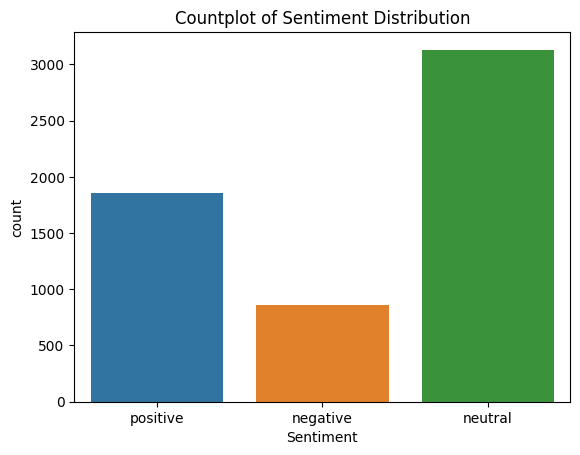

In [3]:
# Count the occurrences of each value in the 'Sentiment' column
print(df['Sentiment'].value_counts())

# Create a countplot to visualize the distribution of Sentiment
sns.countplot(df['Sentiment'])

# Add a title for the plot
plt.title('Countplot of Sentiment Distribution')

# Show the plot
plt.show()

### Tokenization

In [4]:
# Create a tokenizer using RegexpTokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')

# Tokenize the first sentence in the 'Sentence' column of the DataFrame 
tokenized_document = tokenizer.tokenize(df['Sentence'].values[0])

print(tokenized_document)


['The', 'GeoSolutions', 'technology', 'will', 'leverage', 'Benefon', "'s", 'GPS', 'solutions', 'by', 'providing', 'Location', 'Based', 'Search', 'Technology', 'a', 'Communities', 'Platform', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model']


### Stopwords Removal

In [5]:
# Get the list of English stopwords from NLTK
stopwords = nltk.corpus.stopwords.words('english')

# Tokenized document obtained from the previous code block
# Make sure 'tokenized_document' is defined before running this code

# Initialize an empty list to store cleaned tokens
cleaned_tokens = []

# Iterate through each token in the tokenized document
for word in tokenized_document:
    # Convert the word to lowercase to ensure consistent matching
    word = word.lower()

    # Check if the word is not a stopword
    if word not in stopwords:
        # If not a stopword, add it to the cleaned_tokens list
        cleaned_tokens.append(word)

# Print the cleaned tokens after removing stopwords
print(cleaned_tokens)

['geosolutions', 'technology', 'leverage', 'benefon', "'s", 'gps', 'solutions', 'providing', 'location', 'based', 'search', 'technology', 'communities', 'platform', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model']


### Stemming 

In [6]:
# Create a PorterStemmer object
stemmer = PorterStemmer()

# Apply the stemmer to each word in the list of cleaned tokens
stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

# Print the list of stemmed words
print(stemmed_text)

['geosolut', 'technolog', 'leverag', 'benefon', "'s", 'gp', 'solut', 'provid', 'locat', 'base', 'search', 'technolog', 'commun', 'platform', 'locat', 'relev', 'multimedia', 'content', 'new', 'power', 'commerci', 'model']


### Preprocess text function

In [7]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize the input text using RegexpTokenizer
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)

    # Initialize an empty list to store cleaned tokens
    cleaned_tokens = []

    # Iterate through each token in the tokenized document
    for word in tokenized_document:
        # Convert the word to lowercase for consistency
        word = word.lower()

        # Check if the word is not a stopword
        if word not in stopwords:
            # If not a stopword, add it to the cleaned_tokens list
            cleaned_tokens.append(word)

    # Apply stemming to the cleaned tokens using a stemmer (stemmer should be defined before using this function)
    stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

    # Return the preprocessed and stemmed text
    return stemmed_text

In [9]:
df['Sentence'] = df['Sentence'].apply(preprocess_text)

df.head()

,Sentence,Sentiment
0,"[geosolut, technolog, leverag, benefon, 's, gp...",positive
1,"[esi, low, 1, 50, 2, 50, bk, real, possibl]",negative
2,"[last, quarter, 2010, componenta, 's, net, sal...",positive
3,"[accord, finnish, russian, chamber, commerc, m...",neutral
4,"[swedish, buyout, firm, sold, remain, 22, 4, p...",neutral


### Word Cloud generation

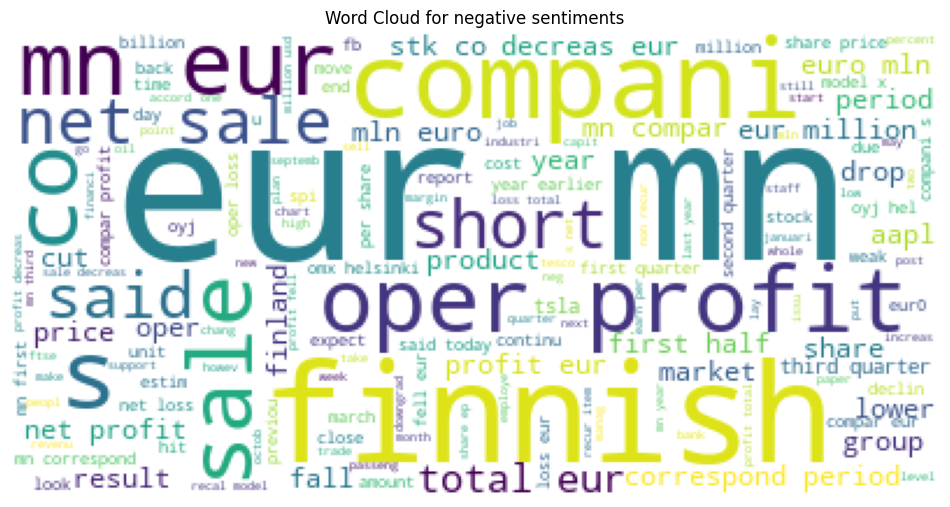

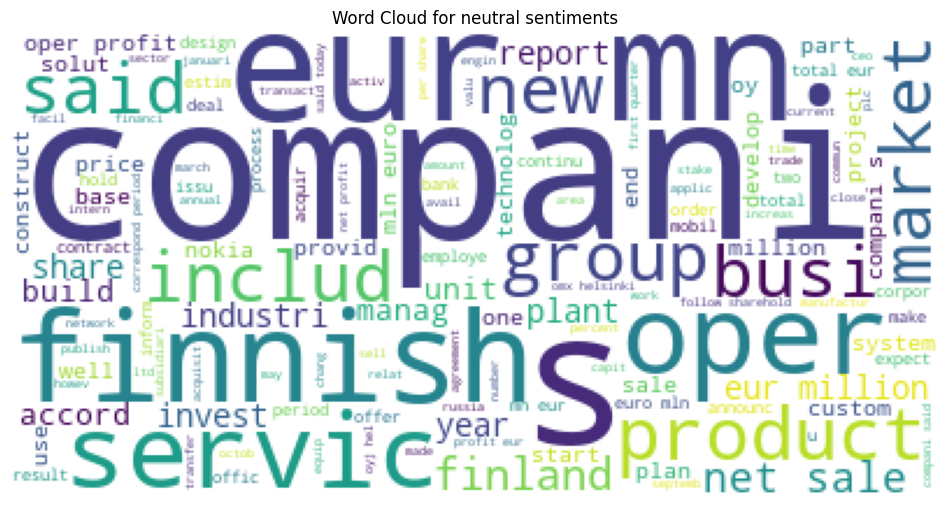

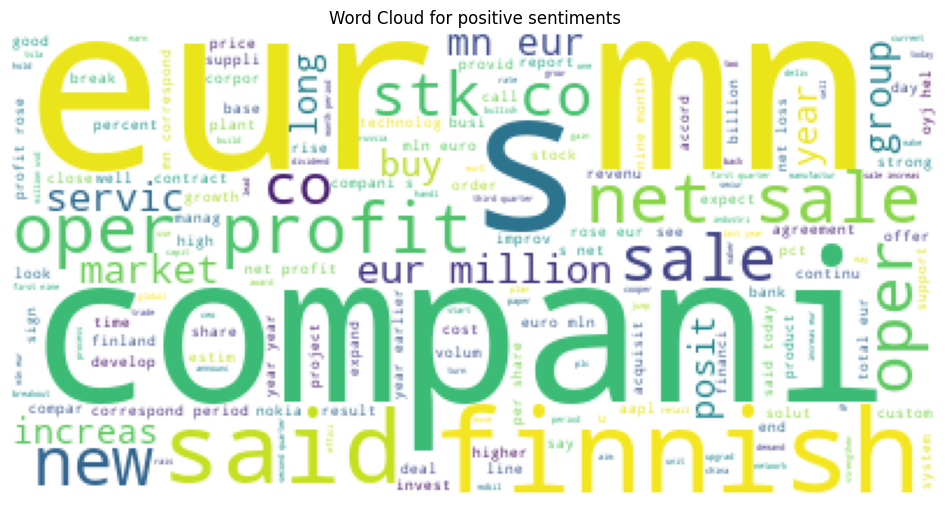

In [19]:
for _,sentiment_df in df.groupby('Sentiment'):
    sentiment_df['Sentence'] = sentiment_df['Sentence'].map(' '.join)

    sentiments = ' '.join((sentiment_df['Sentence']).values)
    worldcloud = WordCloud(background_color='white').generate_from_text(sentiments)

    plt.figure(figsize = (12,12))
    plt.imshow(worldcloud)
    plt.title(f'Word Cloud for {_} sentiments')
    plt.axis('off')
    plt.show()

## Tfid Vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['Sentence'].map(' '.join))
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,8821,8822,8823,8824,8825,8826,8827,8828,8829,8830
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

## Handling Class Imbalance by Undersampling 

In [14]:
from imblearn.under_sampling import RandomUnderSampler


# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data
X_train, y_train = rus.fit_resample(X_train, y_train)

## Helper Funtions 
This code below defines several functions to compute and plot classification metrics for a machine learning model.

The compute_metrics function takes three arguments: y_test, preds, and model_name. It uses these inputs to compute and print several classification metrics: accuracy score, F1 score, ROC-AUC score, precision score, and recall score. It also saves the results of each metric to corresponding dictionaries: accuracy_results, f1_results, roc_auc_results, precision_results, and recall_results.

The plot_conf_matrix function takes four arguments: model_name, y_test, preds,labels. It uses these inputs to compute the confusion matrix for the model predictions and plot it using the ConfusionMatrixDisplay function from scikit-learn.


In [15]:
# Dictionary to store the different metric results
precision_results = {}
recall_results = {}
accuracy_results = {}
f1_results = {}

from sklearn.metrics import  ConfusionMatrixDisplay,accuracy_score,f1_score,recall_score, precision_score
def plot_conf_matrix(model, y_test, preds):
    ConfusionMatrixDisplay.from_predictions(y_test,preds,  cmap='coolwarm')
    plt.title(f'Confusion Matrix of {model}')
    plt.grid(False)
    plt.show()


def compute_metrics(y_test, preds, model_name):

    acc = accuracy_score(y_test, preds)
    accuracy_results[model_name] = acc
    print(f'Accuracy score: {acc}')

    f1 = f1_score(y_test, preds, average='weighted')
    f1_results[model_name] = f1
    print(f'F1 score: {f1}')


    precision = precision_score(y_test, preds, average='weighted')
    precision_results[model_name] = precision
    print(f'Precision score: {precision}')

    recall = recall_score(y_test, preds, average='weighted')
    recall_results[model_name] = recall
    print(f'Recall score: {recall}')

### Multinomial Naive Bayes

Accuracy score: 0.6240730176839704
F1 score: 0.6414627567760895
Precision score: 0.6969338436158486
Recall score: 0.6240730176839704


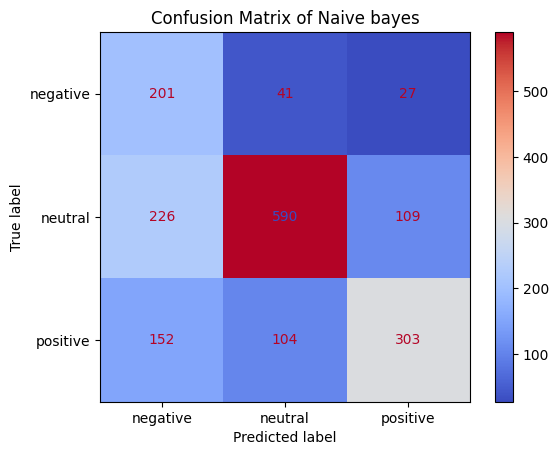

In [16]:
# Import the necessary library
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Compute and display classification metrics
compute_metrics(y_test, y_pred, 'Naive Bayes')

# Plot the confusion matrix
plot_conf_matrix('Naive Bayes', y_test, y_pred)

### Logistic Regression

Accuracy score: 0.6588705077010839
F1 score: 0.6685409551753633
Precision score: 0.6904317446262793
Recall score: 0.6588705077010839


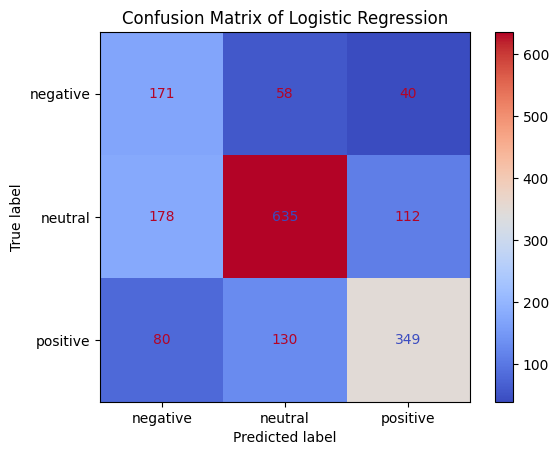

In [17]:
# Import the necessary library
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with specified hyperparameters
log_reg = LogisticRegression(C=1, max_iter=1000)

# Train the Logistic Regression model using the training data
log_reg.fit(X_train, y_train)

# Predict the labels for the test data
preds = log_reg.predict(X_test)

# Compute and display classification metrics
compute_metrics(y_test, preds, 'Logistic Regression')

# Plot the confusion matrix
plot_conf_matrix('Logistic Regression', y_test, preds)

### Predict Sentiment Function

In [18]:
# Function to predict sentiment
def predict_sentiment(text):
    # Preprocess the input text
    processed_text = preprocess_text(text)
    
    # Join the processed tokens into a string
    processed_text = ' '.join(processed_text)
    
    # Transform the processed text using the pre-trained vectorizer
    transformed_text = vectorizer.transform([processed_text])
    
    # Make predictions using the pre-trained logistic regression model
    pred = log_reg.predict(pd.DataFrame(transformed_text.toarray()))
    
    # Return the predicted sentiment label
    return pred[0]

# Test the function with example texts
print(predict_sentiment('Prices of the stocks are rising as predicted'))
print(predict_sentiment('Prices of the stocks are lower than expected'))
print(predict_sentiment('Stocks are gaining as predicted'))
print(predict_sentiment('We are experiencing a loss at the moment'))
print(predict_sentiment('We broke even'))
print(predict_sentiment('We had low profit'))

positive
negative
positive
negative
neutral
negative
